Total Time of Flight: 262.03s
Maximum Velocity: 971.59m/s, at Time: 68.18s
Maximum Height: 51314.02m (51.31km), at Time: 123.74s
Final Velocity: -491.82m/s
The calculated terminal velocity for the rocket on Earth is: -495.98m/s

Note:   This implies that the rocket never fully reached terminal velocity. This makes sense
	because falling objects never fully reach their terminal velocity and instead they
	approach it asymptotically. However, the rocket does get very close to its terminal
	velocity. The velocity of the rocket reaches 95% of its terminal velocity at
	t = 216.35s, and at this time it is travelling with a velocity of v = -471.18m/s.

Maximum Velocity on Mars: 1941.79m/s
Maximum Height on Mars: 441923.05m (441.92km)

Note:   As seen above, both the maximum velocity and maximum height of the rocket are much higher on Mars.
	This makes sense, because there is less drag force and less gravitational force on Mars. Therefore,
	the rocket must be moving much faster when it runs out

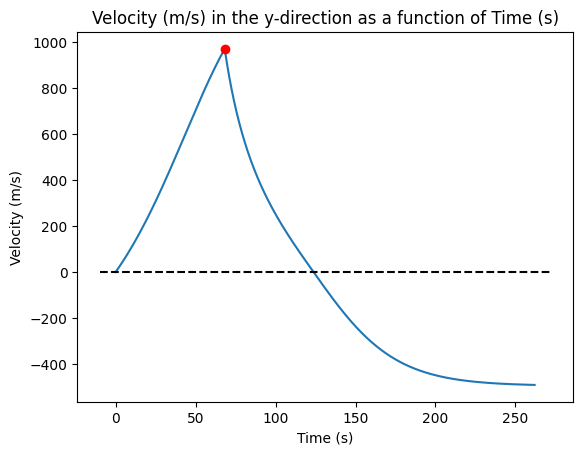

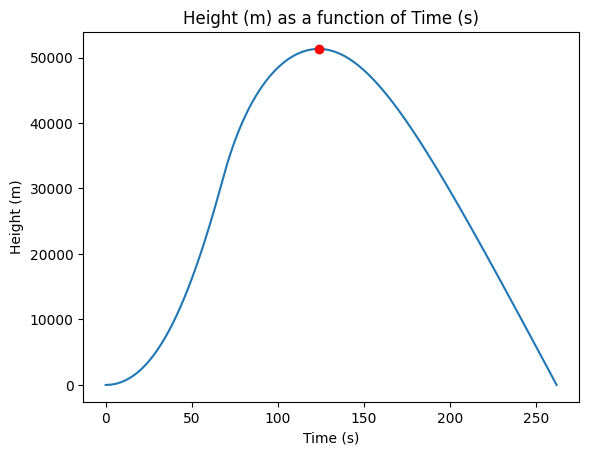

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

#gravitational constants/densities of the atomospheres on earth and mars 

g_e = 9.81 #m/s^2
g_m = 3.72 #m/s^2
p_e = 1.22 #kg/m^3
p_m = 0.020 #kg/m^3

#parameters for Euler's and for Air Drag/Terminal Velocity

C = 0.125 #drag coefficient
A = math.pi * (1.70/2)**2 #cross sectional area
dt = 0.0005 #setting a dt for euler's
dm = 130*dt #setting the equivalent dm for the dt - 130kg burned per second

#initializing mass variables
#RNG seed = 800813569666100101
M = 13204 #kg - mass of rocket and of the current amount of fuel
M_r = 4340 #kg - mass of just the rocket (remains unchanged)
M_f = 8864 #kg - mass of the fuel
v_e = 2000 #m/s - ejection velocity from the thrust

#initializing forces, time and height variables, as well as the required lists/marker variables for graphs later..

F_thrust, F_gravity, F_drag, F_net = 0, 0, 0, 0 #N
v_y = 0 #m/s
time = 0 #s
height = 0 #m
time_list = []
height_list = []
v_y_list = []
marker_1_x = 0
marker_1_x = 0
marker_2_x = 0
marker_2_y = 0
marker_3_x = 0
marker_3_y = 0

#calculating terminal velocity for the rocket as it falls
V_T = -1*( (2 * M_r * g_e) / (C * p_e * A) )**(1/2)

#this is the motion from launch to when the rocket runs out of fuel
while (M > M_r): 
    F_gravity = M*g_e #this calculates the gravitational force acting upon the rocket with its current total mass
    F_drag = (1/2)*p_e*(v_y**2)*C*A #this calculates the drag force acting upon the rocket
    F_thrust = v_e * (dm/dt) #this is essentially v_e * 130, because dm/dt = 130
    F_net = F_thrust - F_drag - F_gravity #this finds the f_net acting upon the rocket. thrust in +y, drag and gravity in -y
    
    a_y = F_net/M #finds acceleration
    v_y = v_y + (a_y * dt) #iterates the new velocity using the acceleration we just determined
    height = height + (v_y * dt) #updates the height using the velocity we just determined
    
    #if total mass - dm is less then the mass of the rocket, we have a problem because we CANNOT burn fuel that doesn't exist.
    if (M-dm) > M_r: #if total mass - dm are greater then, then proceed normally
        M = M - dm #updates new mass amount
        M_f = M_f - dm #updates new fuel amount
        time = time + dt #iterates time
        
        time_list.append(time)
        height_list.append(height)
        v_y_list.append(v_y)
        
    else: #else if its not, we need to determine how much time it took to burn the remaining fuel, as the remaining fuel is less then dm
        
        extra_m = M - M_r #finds how much fuel we have remaining
        extra_t = (extra_m/dm)*dt #finds how long it'll take to burn the remaining fuel
        M = M - extra_m #updates new mass amount (should = M_r)
        M_f = M_f - extra_m #updates new fuel amount (should be = 0)
        time = time + extra_t #iterates time with correct time amount to burn the last little bit of fuel
        
        time_list.append(time)
        height_list.append(height)
        v_y_list.append(v_y)

#these markers are used in the graphs later for the maximum velocity and what time the rocket hit it
marker_1_x = time_list[-1]
marker_1_y = v_y_list[-1]

#this loop is about the motion while the rocket is still moving upwards after all fuel has been burnt, but is slowing down.
while (v_y > 0): 
    F_gravity = M*g_e #this calculates the gravitational force acting upon the rocket with its current total mass
    F_drag = (1/2)*p_e*(v_y**2)*C*A #this calculates the drag force acting upon the rocket
    F_net = 0 -  F_drag - F_gravity #this finds the f_net acting upon the rocket. thrust is now 0, drag and gravity in the -y direction
    
    a_y = F_net/M #finds acceleration
    v_y = v_y + (a_y * dt) #iterates the new velocity using the acceleration we just determined
    height = height + (v_y * dt) #updates the height using the velocity we just determined
    time = time + dt #iterates time
    
    time_list.append(time)
    height_list.append(height)
    v_y_list.append(v_y)

#these markers are used in the graphs later for the maximum height and what time the rocket hit it
marker_2_x = time_list[-1]
marker_2_y = height_list[-1]

#this loop is about the motion of the rocket as it falls from its max height to the ground
while (height > 0): 
    F_gravity = M*g_e #this calculates the gravitational force acting upon the rocket with its current total mass
    F_drag = (1/2)*p_e*(v_y**2)*C*A #this calculates the drag force acting upon the rocket
    F_net = F_drag - F_gravity #this finds the f_net acting upon the rocket. drag has switched directions and is now +y, gravity in the -y direction
    
    a_y = F_net/M #finds acceleration
    v_y = v_y + (a_y * dt)
    height = height + (v_y * dt)
    time = time + dt
    
    if (height < 0): #if the height calulated is lower than 0, this if loop corrects everything.
        extra_h = height #finds how much "extra" distance was traveled
        extra_t = extra_h / v_y #finds how much time it takes to travel the "extra" distance
        time = time - extra_t #corrects the time of flight
        height = height - extra_h #corrects the distance travelled
    
    time_list.append(time)
    height_list.append(height)
    v_y_list.append(v_y)
    
    #this if statement is checking if the velocity of the rocket falling is 95% of the terminal velocity, and if the marker has been set already
    if (v_y/V_T) >=(0.95) and (marker_3_x == 0):
        marker_3_x = time_list[-1]
        marker_3_y = v_y_list[-1]

#print statements that describe the motion
km = marker_2_y/1000
print("Total Time of Flight: %0.2fs"%time_list[-1])
print("Maximum Velocity: %0.2fm/s, at Time: %0.2fs"%(marker_1_y,marker_1_x))
print("Maximum Height: %0.2fm (%0.2fkm), at Time: %0.2fs"%(marker_2_y,km,marker_2_x))
print("Final Velocity: %0.2fm/s"%(v_y_list[-1]))
print("The calculated terminal velocity for the rocket on Earth is: %0.2fm/s\n"%(V_T))

print("Note:   This implies that the rocket never fully reached terminal velocity. This makes sense")
print("\tbecause falling objects never fully reach their terminal velocity and instead they")
print("\tapproach it asymptotically. However, the rocket does get very close to its terminal")
print("\tvelocity. The velocity of the rocket reaches 95% of its terminal velocity at")
print("\tt = %0.2fs, and at this time it is travelling with a velocity of v = %0.2fm/s.\n"%(marker_3_x,marker_3_y))

#makes plots
plt.figure()
plt.plot(time_list, v_y_list) #vy as a function of t
plt.hlines(y=0,xmin= -10, xmax=time_list[-1]+10, colors='black', linestyles='--') #makes dotted line at 0
plt.plot(marker_1_x, marker_1_y, 'ro') #puts marker at maximum velocity
plt.title('Velocity (m/s) in the y-direction as a function of Time (s)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.figure()
plt.plot(time_list, height_list) #height as a function of t
plt.plot(marker_2_x, marker_2_y, 'ro') #puts marker at maximum velocity
plt.title('Height (m) as a function of Time (s)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')



      
#MARS

M = 13204 #kg - mass of rocket and of the current amount of fuel
M_r = 4340 #kg - mass of just the rocket (remains unchanged)
M_f = 8864 #kg - mass of the fuel
v_e = 2000 #m/s - ejection velocity from the thrust

#initializing forces, time and height variables, as well as the required lists.
F_thrust, F_gravity, F_drag, F_net = 0, 0, 0, 0 #N
v_y = 0 #m/s
time = 0 #s
height = 0 #m

#this is the motion from launch to when the rocket runs out of fuel
while (M > M_r): 
    F_gravity = M*g_m #this calculates the gravitational force acting upon the rocket with its current total mass
    F_drag = (1/2)*p_m*(v_y**2)*C*A #this calculates the drag force acting upon the rocket
    F_thrust = v_e * (dm/dt) #this is essentially v_e * 130, because dm/dt = 130
    F_net = F_thrust - F_drag - F_gravity #this finds the f_net acting upon the rocket. thrust in +y, drag and gravity in -y
    
    a_y = F_net/M #finds acceleration
    v_y = v_y + (a_y * dt) #iterates the new velocity using the acceleration we just determined
    height = height + (v_y * dt) #updates the height using the velocity we just determined
    
    #if total mass - dm is less then the mass of the rocket, we have a problem because we CANNOT burn fuel that doesn't exist.
    if (M-dm) > M_r: #if total mass - dm are greater then, then proceed normally
        M = M - dm #updates new mass amount
        M_f = M_f - dm #updates new fuel amount
        time = time + dt #iterates time
        
    else: #else if its not, we need to determine how much time it took to burn the remaining fuel, as the remaining fuel is less then dm
        
        extra_m = M - M_r #finds how much fuel we have remaining
        extra_t = (extra_m/dm)*dt #finds how long it'll take to burn the remaining fuel
        M = M - extra_m #updates new mass amount (should = M_r)
        M_f = M_f - extra_m #updates new fuel amount (should be = 0)
        time = time + extra_t #iterates time with correct time amount to burn the last little bit of fuel
        
#print statement that describes the motion
print("Maximum Velocity on Mars: %0.2fm/s"%(v_y))

#this loop is about the motion while the rocket is still moving upwards after all fuel has been burnt, but is slowing down.
while (v_y > 0): 
    F_gravity = M*g_m #this calculates the gravitational force acting upon the rocket with its current total mass
    F_drag = (1/2)*p_m*(v_y**2)*C*A #this calculates the drag force acting upon the rocket
    F_net = 0 -  F_drag - F_gravity #this finds the f_net acting upon the rocket. thrust is now 0, drag and gravity in the -y direction
    a_y = F_net/M #finds acceleration
    v_y = v_y + (a_y * dt) #iterates the new velocity using the acceleration we just determined
    height = height + (v_y * dt) #updates the height using the velocity we just determined
    time = time + dt #iterates time
    
km = height/1000 #converts height to km
#print statements that describe the motion
print("Maximum Height on Mars: %0.2fm (%0.2fkm)\n" %(height, km))
print("Note:   As seen above, both the maximum velocity and maximum height of the rocket are much higher on Mars.")
print("\tThis makes sense, because there is less drag force and less gravitational force on Mars. Therefore,")
print("\tthe rocket must be moving much faster when it runs out of fuel, and then it will take much longer")
print("\tfor the rocket to be slowed down compared to earth, meaning its maximum velocity and height should")
print("\tbe much higher on Mars compared to Earth.\n")
      
print("\nOn the plots, the red dots represent the maximum velocity and the maximum height respectively.")
print("Both plots are representing the motion of the rocket on Earth.\n")

plt.show() #makes plots visible